# 04 - Infonuagique 1 - Atelier #1

### Importation des bibliothèques

In [1]:
import io
import os
from google.cloud import vision

from utils import display_objects_results, display_image

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

### Affichage de l'image

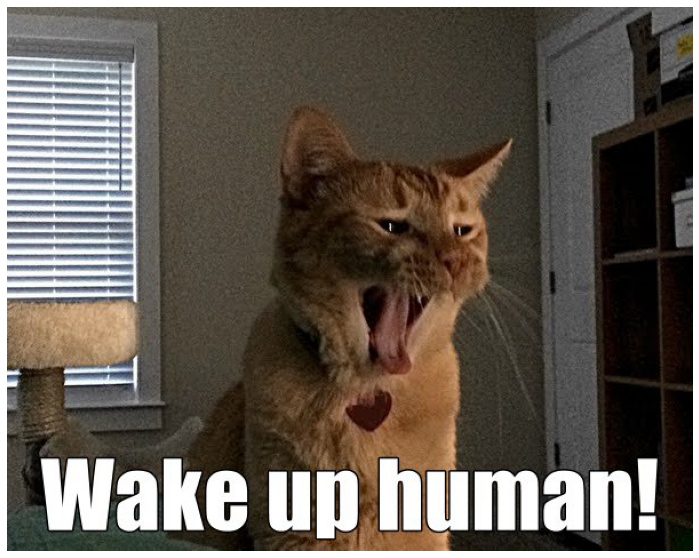

In [3]:
_ = display_image('wakeupcat.jpg')

### Instanciation du client

In [4]:
client = vision.ImageAnnotatorClient()

DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or explicitly create credentials and re-run the application. For more information, please see https://cloud.google.com/docs/authentication/getting-started

### Chargement de l'image

In [ ]:
file_name = os.path.abspath('wakeupcat.jpg')

with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

### Détection des "étiquette" présentes dans l'image

In [ ]:
response = client.label_detection(image=image)
labels = response.label_annotations

In [ ]:
print('Labels:')
for label in labels:
    print(label.description)

### Détection d'objets

In [ ]:
objects = client.object_localization(image=image).localized_object_annotations

In [ ]:
print('Number of objects found: {}'.format(len(objects)))
for object_ in objects:
    print('\n{} (confidence: {})'.format(object_.name, object_.score))
    print('Normalized bounding polygon vertices: ')
    for vertex in object_.bounding_poly.normalized_vertices:
        print(' - ({}, {})'.format(vertex.x, vertex.y))

In [ ]:
display_objects_results('wakeupcat.jpg', objects, 0.5)

### Avec une autre image

In [ ]:
file_name = os.path.abspath('raptors.jpg')

with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

In [ ]:
response = client.label_detection(image=image)
labels = response.label_annotations

In [ ]:
print('Labels:')
for label in labels:
    print(label.description)

In [ ]:
objects = client.object_localization(image=image).localized_object_annotations

In [ ]:
display_objects_results('raptors.jpg', objects, 0.5)